In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('test_scores.csv')

# Преобразование категориальных переменных в числовые для корреляционного анализа
df_corr = df.copy()

# Кодирование бинарных признаков
df_corr['teaching_method'] = df_corr['teaching_method'].map({'Standard': 0, 'Experimental': 1})
df_corr['gender'] = df_corr['gender'].map({'Male': 0, 'Female': 1})
df_corr['lunch'] = df_corr['lunch'].map({'Does not qualify': 0, 'Qualifies for reduced/free lunch': 1})

df_corr = pd.get_dummies(df_corr, columns=['school_setting', 'school_type'], drop_first=True)

# Удаление неколичественных столбцов
df_corr = df_corr.drop(['school', 'classroom', 'student_id'], axis=1)

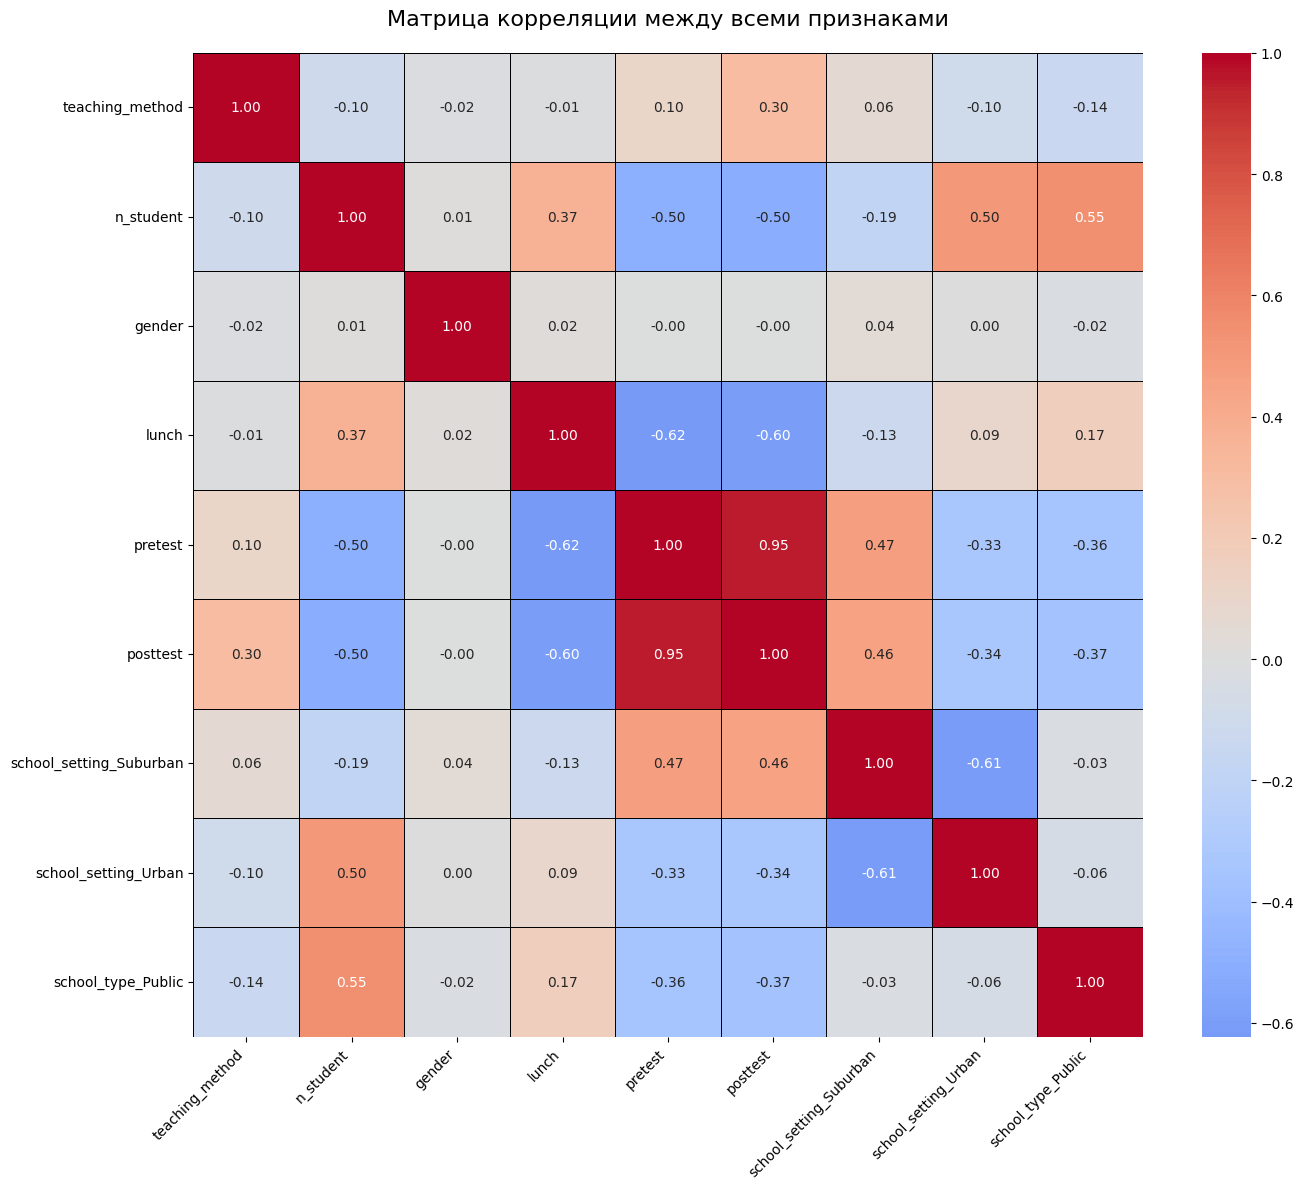

In [15]:
# Расчет корреляционной матрицы
corr_matrix = df_corr.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            annot_kws={'size': 10}, linewidths=0.5, linecolor='black')
plt.title('Матрица корреляции между всеми признаками', pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
# Корреляция с целевой переменной
posttest_corr = corr_matrix['posttest'].sort_values(ascending=False)

print("Корреляция признаков с posttest:")
print(posttest_corr.to_string())

Корреляция признаков с posttest:
posttest                   1.000000
pretest                    0.950223
school_setting_Suburban    0.460448
teaching_method            0.304392
gender                    -0.003519
school_setting_Urban      -0.337508
school_type_Public        -0.367656
n_student                 -0.504600
lunch                     -0.597991


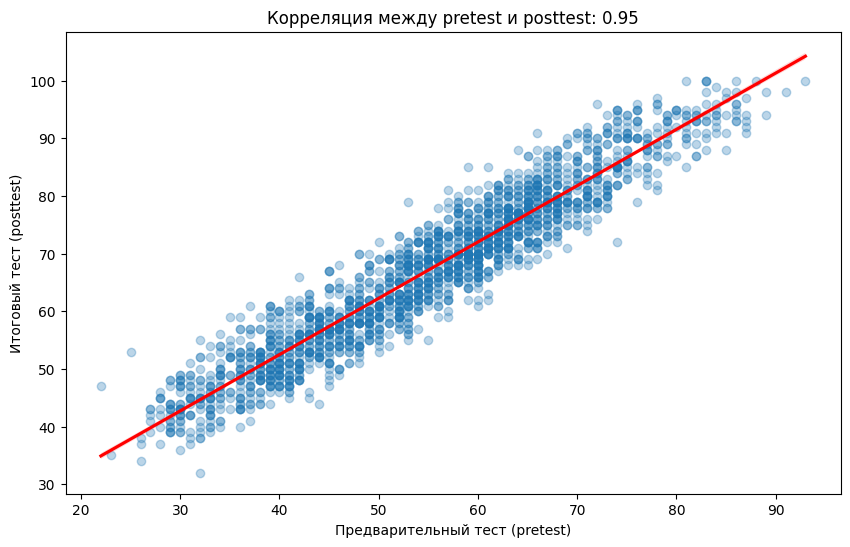

In [17]:
# График рассеяния pretest vs posttest
plt.figure(figsize=(10, 6))
sns.regplot(x='pretest', y='posttest', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title(f'Корреляция между pretest и posttest: {corr_matrix.loc["pretest", "posttest"]:.2f}')
plt.xlabel('Предварительный тест (pretest)')
plt.ylabel('Итоговый тест (posttest)')
plt.show()

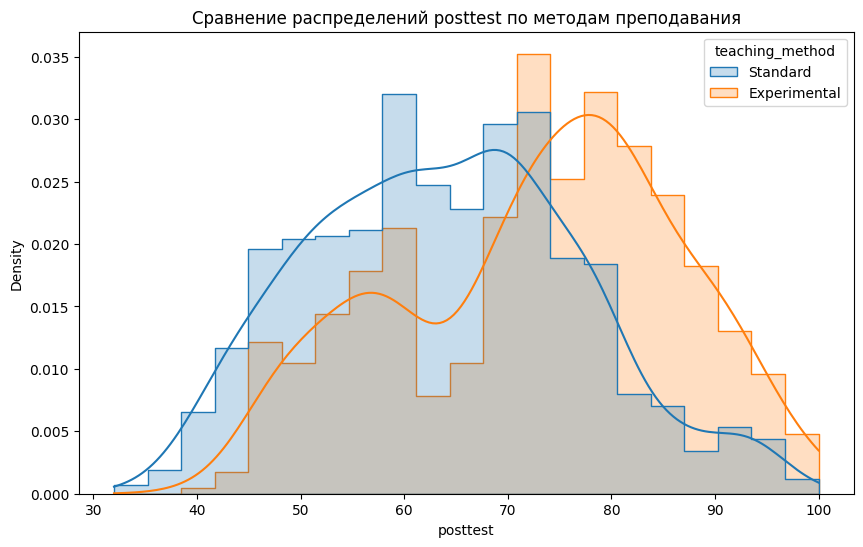

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='posttest', hue='teaching_method', kde=True, 
             element='step', stat='density', common_norm=False)
plt.title('Сравнение распределений posttest по методам преподавания')
plt.show()

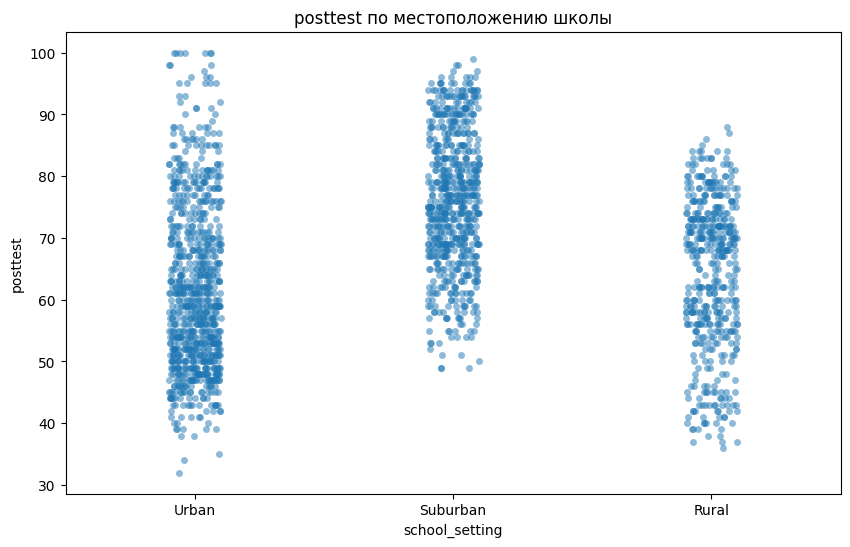

In [19]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='school_setting', y='posttest', data=df, jitter=True, alpha=0.5)
plt.title('posttest по местоположению школы')
plt.show()

<Figure size 1000x600 with 0 Axes>

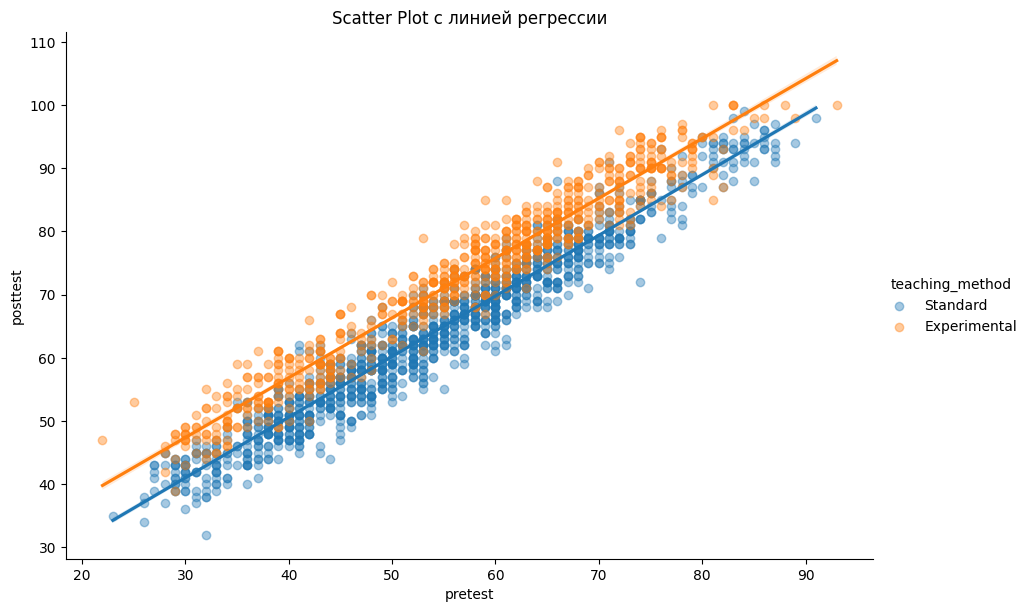

In [20]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='pretest', y='posttest', hue='teaching_method', data=df, 
           height=6, aspect=1.5, scatter_kws={'alpha':0.4})
plt.title('Scatter Plot с линией регрессии')
plt.show()

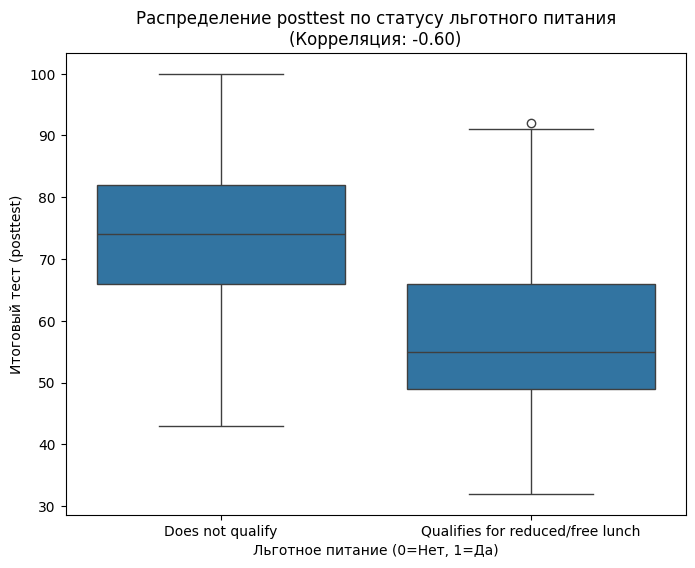

In [21]:
# Boxplot для lunch
plt.figure(figsize=(8, 6))
sns.boxplot(x='lunch', y='posttest', data=df)
plt.title(f'Распределение posttest по статусу льготного питания\n(Корреляция: {corr_matrix.loc["lunch", "posttest"]:.2f})')
plt.xlabel('Льготное питание (0=Нет, 1=Да)')
plt.ylabel('Итоговый тест (posttest)')
plt.xticks([0, 1], ['Does not qualify', 'Qualifies for reduced/free lunch'])
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop(['posttest', 'school', 'classroom', 'student_id', 'n_student'], axis=1)
y = df['posttest']

categorical_features = ['school_setting', 'school_type', 'teaching_method', 'gender', 'lunch']
numeric_features = ['pretest']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

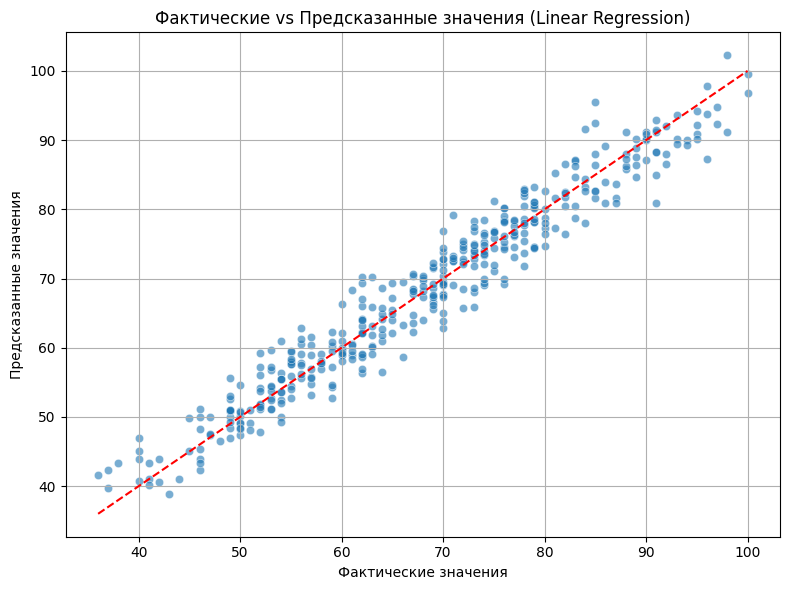

C:\Users\Савелий\AppData\Local\Temp\ipykernel_18892\440060259.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x="Weight", y="Feature", palette="coolwarm")


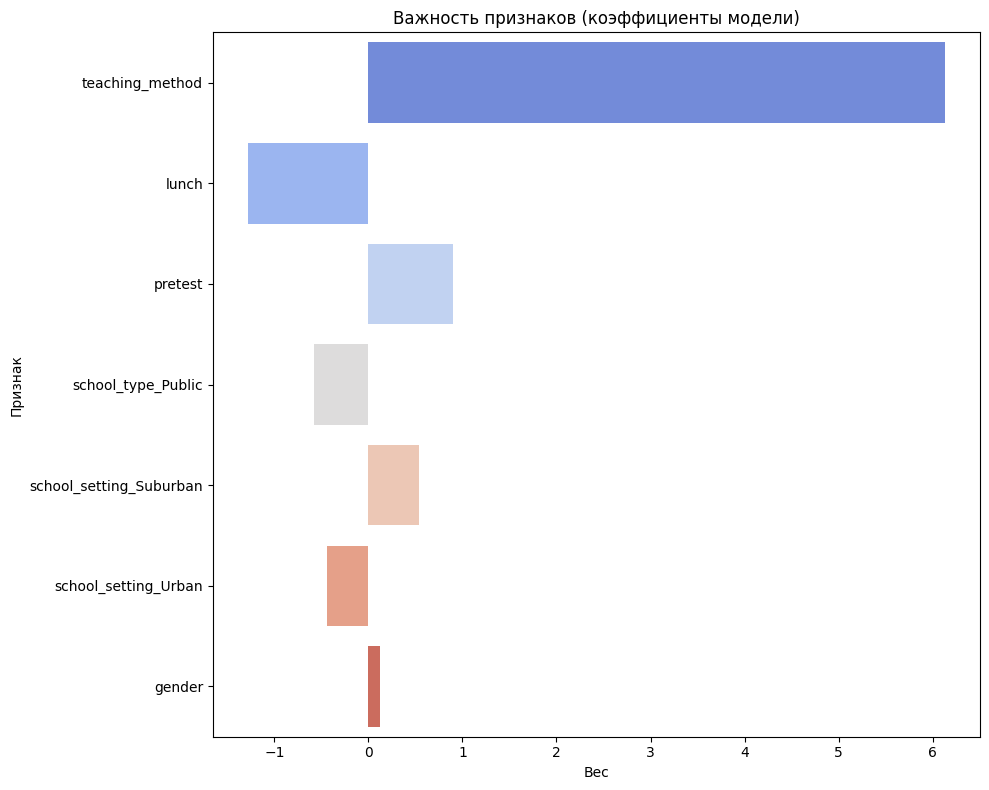

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Загрузка тестовых данных
df_test = pd.read_csv("../data/processed/test.csv")
  # проверь путь, если не совпадает — поправь

# Разделение на X и y
X_test = df_test.drop(columns=["posttest"])
y_test = df_test["posttest"]

# Загрузка обученной модели
model = joblib.load("../models/linear_regression_model.pkl")

# Предсказание
y_pred = model.predict(X_test)

# График фактические vs предсказанные
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()

# График важности признаков (веса коэффициентов)
coefficients = pd.DataFrame({
    "Feature": X_test.columns,
    "Weight": model.coef_
}).sort_values("Weight", key=abs, ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=coefficients, x="Weight", y="Feature", palette="coolwarm")
plt.title("Важность признаков (коэффициенты модели)")
plt.xlabel("Вес")
plt.ylabel("Признак")
plt.tight_layout()
plt.show()


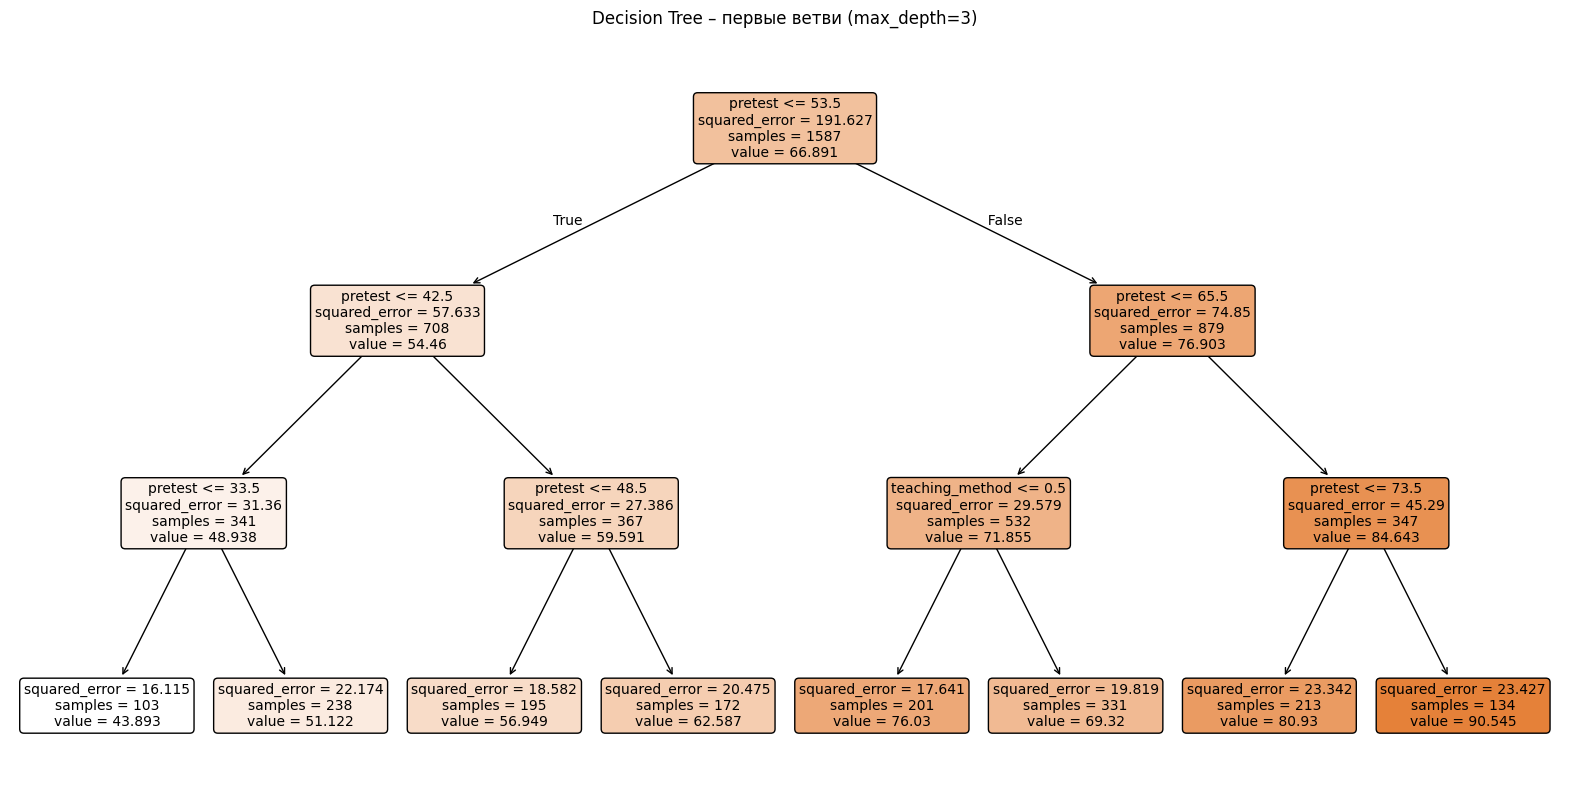

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

df = pd.read_csv("test_scores.csv")

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=["posttest"])
y = df["posttest"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(max_depth=3, random_state=42)  
tree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree – первые ветви (max_depth=3)")
plt.show()


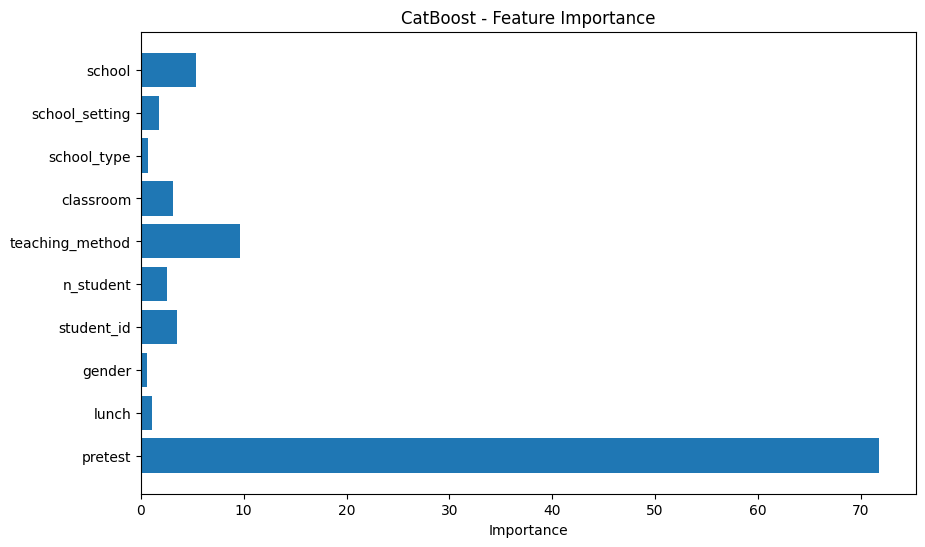

<Figure size 1000x600 with 0 Axes>

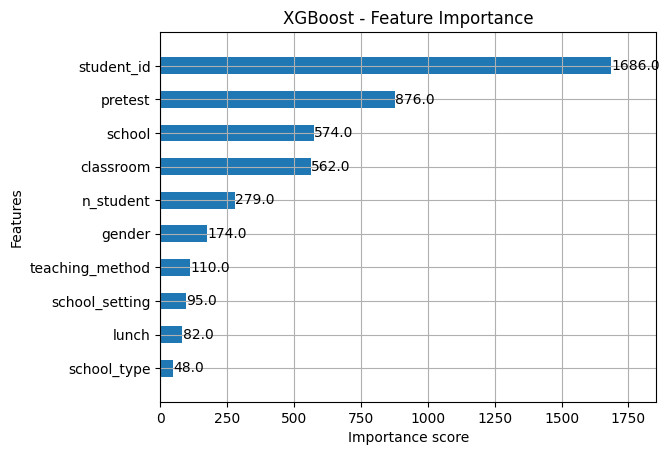

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor, plot_importance

df = pd.read_csv("test_scores.csv")

categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=["posttest"])
y = df["posttest"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost_model = CatBoostRegressor(verbose=0)
catboost_model.fit(X_train, y_train)

feature_importances_cat = catboost_model.get_feature_importance()
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances_cat)
plt.title("CatBoost - Feature Importance")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, height=0.5)
plt.title("XGBoost - Feature Importance")
plt.show()


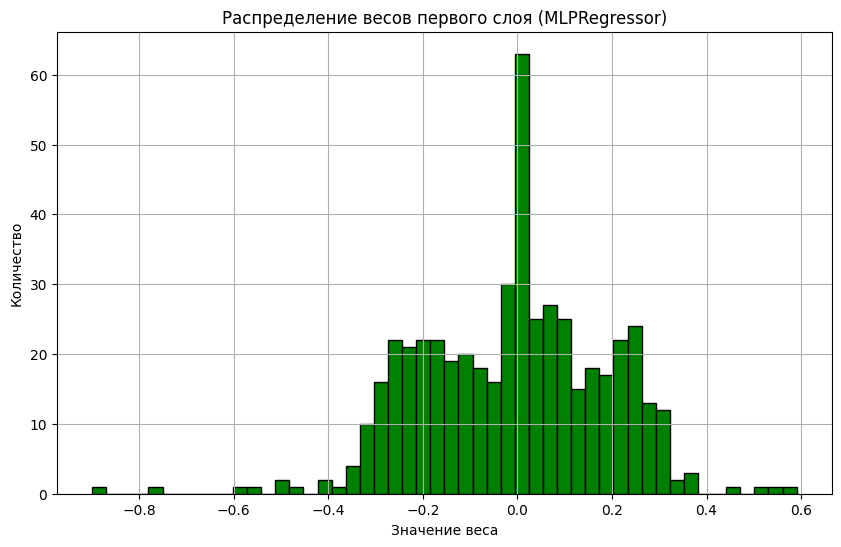

In [36]:
import numpy as np

weights = model.coefs_[0]

plt.figure(figsize=(10, 6))
plt.hist(weights.flatten(), bins=50, color='green', edgecolor='black')
plt.title("Распределение весов первого слоя (MLPRegressor)")
plt.xlabel("Значение веса")
plt.ylabel("Количество")
plt.grid(True)
plt.show()


Iteration 1, loss = 19714.49767024
Iteration 2, loss = 7423.92464839
Iteration 3, loss = 1654.82088185
Iteration 4, loss = 466.06950065
Iteration 5, loss = 713.65141601
Iteration 6, loss = 649.18436970
Iteration 7, loss = 421.83166041
Iteration 8, loss = 329.33583647
Iteration 9, loss = 292.69052201
Iteration 10, loss = 219.23245120
Iteration 11, loss = 155.89256847
Iteration 12, loss = 121.82150954
Iteration 13, loss = 93.31657769
Iteration 14, loss = 80.97295001
Iteration 15, loss = 69.97546158
Iteration 16, loss = 63.40813463
Iteration 17, loss = 58.10970538
Iteration 18, loss = 53.66541264
Iteration 19, loss = 50.08142246
Iteration 20, loss = 46.99078736
Iteration 21, loss = 44.20603505
Iteration 22, loss = 41.75442812
Iteration 23, loss = 39.30935932
Iteration 24, loss = 37.31318825
Iteration 25, loss = 35.63554202
Iteration 26, loss = 33.95441088
Iteration 27, loss = 32.47368998
Iteration 28, loss = 31.33956821
Iteration 29, loss = 29.93813840
Iteration 30, loss = 28.65099694
Ite

c:\Users\Савелий\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


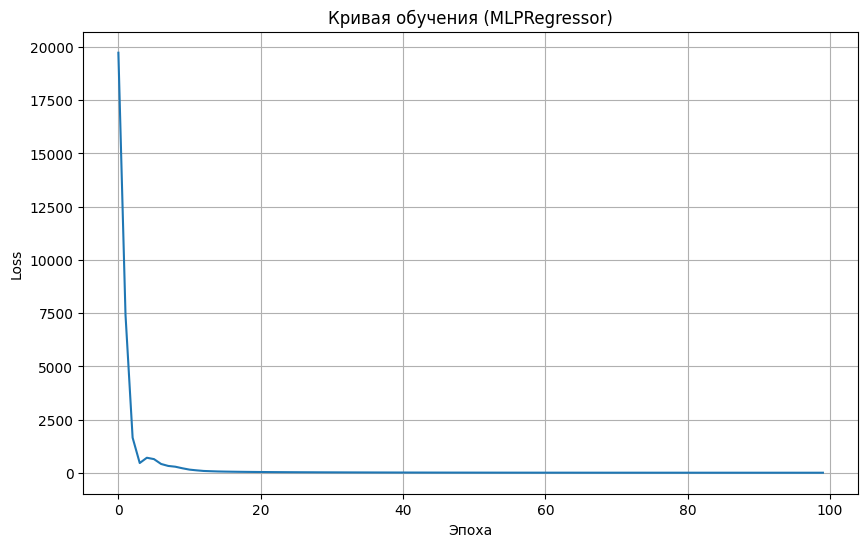

In [35]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=100, verbose=True)
model.fit(X_train, y_train)

# Кривая обучения
plt.figure(figsize=(10, 6))
plt.plot(model.loss_curve_)
plt.title('Кривая обучения (MLPRegressor)')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


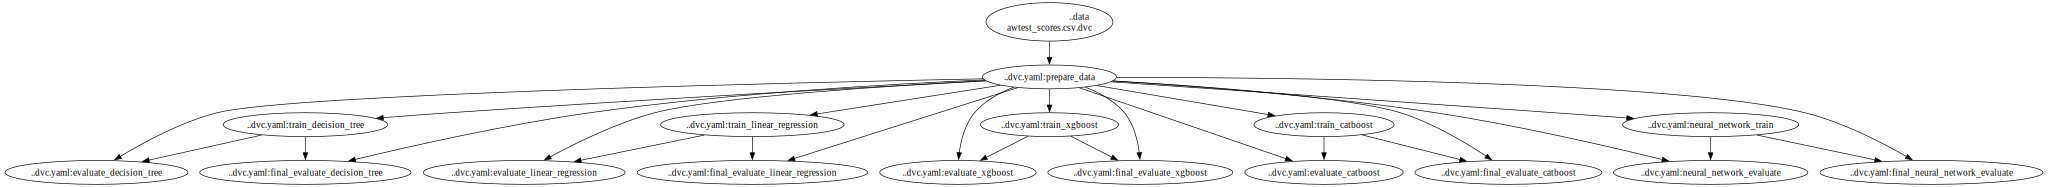

In [4]:
!dvc dag --dot > dag.dot

from graphviz import Source
Source.from_file("dag.dot")